# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

# Question 1

**Explain how you solve the model**

**Defined variables and equasions**

In [21]:
import numpy as np
import matplotlib.pyplot as plt

#defined variables and equasions

def omega1B(omega1A):
    return 1 - omega1A

def omega2B(omega2A):
    return 1 - omega2A

#preferences
alpha = 1/3
beta = 2/3

#endowment
omega1A = 0.8
omega2A = 0.3


#utility functions
def utility_A(x1A, x2A, alpha):
    return x1A**alpha * x2A**(1-alpha)

def utility_B(x1B, x2B, beta):
    return x1B**beta * x2B**(1-beta)

#demand functions
def demand_1A(p1, p2, omega1A, omega2A):
    return alpha * ((p1 * omega1A + p2 * omega2A)/p1)

def demand_2A(p1, p2, omega1A, omega2A):
    return (1-alpha)*((p1 * omega1A + p2 * omega2A)/p2)

def demand_1B(p1, p2, omega1B, omega2B):
    return beta*((p1*omega1B + p2*omega2B)/p1)

def demand_2B(p1, p2, omega1B, omega2B):
    return (1-beta)*((p1 * omega1B + p2 * omega2B)/p2)

#market clearing
def check_market_clearing1(alpha, p1, p2, omega1A, omega1B):
    return demand_1A(p1, p2, omega1A, omega2A) + demand_1B(p1, p2, omega1B, omega2B) == omega1A + omega1B
def check_market_clearing2(beta, p1, p2, omega2A, omega2B):
    return demand_2A(p1, p2, omega1A, omega2A) + demand_2B(p1, p2, omega1B, omega2B) == omega2A + omega2B

def eps1(p1, p2, demand_1A, omega1A, demand_1B, omega1B):
    return demand_1A(p1, p2, omega1A, omega2A) - omega1A + demand_1B(p1, p2, omega1B, omega2B) - omega1B
def eps2(p1,p2, demand_2A, omega2A, demand_2B, omega2B):
    return demand_2A(p1, p2, omega1A, omega2A) - omega2A + demand_2B(p1, p2, omega1B, omega2B) - omega2B
  

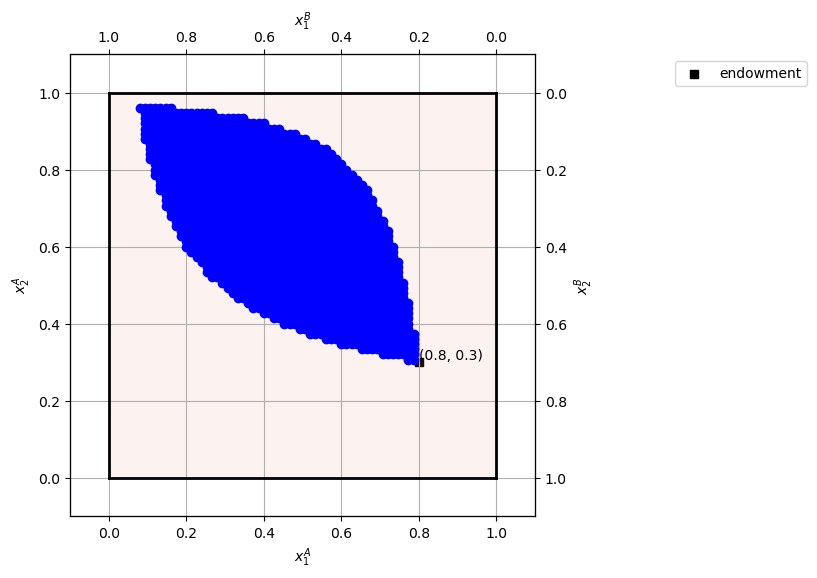

In [22]:
#task 1
import numpy as np
import matplotlib.pyplot as plt

# a. total endowment
omega1bar = 1.0
omega2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

#endowment
omega1A = 0.8
omega2A = 0.3

# A
ax_A.scatter(omega1A,omega2A,marker='s',color='black',label='endowment')
ax_A.text(omega1A, omega2A, f'({omega1A}, {omega2A})', verticalalignment='bottom')

# Define range for xA1 and xA2
N = 75
x1A_range = np.linspace(0, 1, N+1)
x2A_range = np.linspace(0, 1, N+1)

# Find combinations that satisfy the conditions
satisfying_combinations = []
for x1A in x1A_range:
    for x2A in x2A_range:
        if utility_A(x1A, x2A, alpha) >= utility_A(omega1A, omega2A, alpha) and utility_B(1 - x1A, 1 - x2A, beta) >= utility_B(1 - omega1A, 1 - omega2A, beta):
            satisfying_combinations.append((1 - x1A, 1 - x2A)) # Convert to B's coordinates

# Extract x1B and x2B for plotting
x1B_values, x2B_values = zip(*satisfying_combinations)

# Plot satisfying combinations
ax_B.scatter(x1B_values, x2B_values, marker='o', color = 'blue', label='Satisfying Combinations')

# limits
ax_A.plot([0,omega1bar],[0,0],lw=2,color='black')
ax_A.plot([0,omega1bar],[omega2bar,omega2bar],lw=2,color='black')
ax_A.plot([0,0],[0,omega2bar],lw=2,color='black')
ax_A.plot([omega1bar,omega1bar],[0,omega2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, omega1bar + 0.1])
ax_A.set_ylim([-0.1, omega2bar + 0.1])    
ax_B.set_xlim([omega1bar + 0.1, -0.1])
ax_B.set_ylim([omega2bar + 0.1, -0.1])

# Mesh
x = np.linspace(0, omega1bar, 10)
y = np.linspace(0, omega2bar, 10)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

ax_A.contourf(X, Y, Z, 20, cmap='RdGy', alpha=0.1)

# Scale
ax_A.set_xticks(np.arange(0, omega1bar+0.1, 0.2))
ax_A.set_yticks(np.arange(0, omega2bar+0.1, 0.2))
ax_B.set_xticks(np.arange(0, omega1bar+0.1, 0.2))
ax_B.set_yticks(np.arange(0, omega2bar+0.1, 0.2))



ax_A.grid(True)

ax_A.set_xlim([-0.1, omega1bar + 0.1])
ax_A.set_ylim([-0.1, omega2bar + 0.1])    
ax_B.set_xlim([omega1bar + 0.1, -0.1])
ax_B.set_ylim([omega2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))

plt.show()

# Question 2

Explain your code and procedure

In [23]:
class ExtendedExchangeEconomy(ExchangeEconomyClass):

    def cal_market_clearing_errors(self, p1_values):
    
        errors = []
        for p1 in p1_values:
            eps1, eps2 = self.check_market_clearing(p1)
            errors.append((eps1, eps2))
        return np.array(errors)

    def market_clearing_price(self, p1_values):
        """Find the p1 value that minimizes the sum of absolute market clearing errors."""
        errors = self.cal_market_clearing_errors(p1_values)
        absolute_errors = np.sum(np.abs(errors), axis=1)
        min_error_index = np.argmin(absolute_errors)
        return p1_values[min_error_index], errors[min_error_index]

# Define the range of prices p1
P1 = np.linspace(0.5, 2.5, 75)

# Create an instance of the extended exchange economy class
extended_economy = ExtendedExchangeEconomy()

# Calculate market clearing errors for the range of p1 values
market_clearing_errors = extended_economy.cal_market_clearing_errors(P1)

# Find the market clearing price
market_clearing_price, min_error = extended_economy.market_clearing_price(P1)

print(market_clearing_price, min_error)


NameError: name 'ExchangeEconomyClass' is not defined

# Question 3

Explain your code and procedure

In [31]:
#finding the market clearingg price
#A is maximizing their own utility 

# Numerical search for market clearing price


import numpy as np
from scipy.optimize import minimize

# Total endowment
omega1A = 0.8
omega2A = 0.3
omega1B = 1 - omega1A
omega2B = 1 - omega2A

# Parameters
alpha = 1/3 # From the problem statement
beta = 2/3 # From the problem statement
p2 = 1
market_clearing_price_x2 = p2

# Define utility functions
def utility_A(x1A, x2A):
    return x1A**alpha * x2A**(1-alpha)

def utility_B(x1B, x2B):
    return x1B**beta * x2B**(1-beta)

# Define A's budget constraint
def budget_constraint_A(x, p1):
    x1A, x2A = x
    return omega1A * p1 - (p1 * x1A + x2A)

# Define A's objective function (negative utility to maximize)
def objective_A(x):
    x1A, x2A = x
    return -utility_A(x1A, x2A)

# Initial guess for A's consumption
initial_guess_A = [0.5, 0.5]

# Optimization problem for A
result_A = minimize(objective_A, initial_guess_A, constraints={'type': 'eq', 'fun': budget_constraint_A, 'args': (1,)}, bounds=[(0, None), (0, None)])

# Extract optimal consumption for A
x1A_optimal, x2A_optimal = result_A.x
print("Optimal consumption for A (xA1, xA2):", (x1A_optimal, x2A_optimal))

# Calculate B's consumption
x1B_optimal = omega1B - x1A_optimal
x2B_optimal = omega2B - x2A_optimal
x1B_optimal = max(0, x1B_optimal) # Ensure B's consumption is non-negative
x2B_optimal = max(0, x2B_optimal) # Ensure B's consumption is non-negative

# Calculate total demand for each good
total_demand_x1 = x1A_optimal + x1B_optimal
total_demand_x2 = x2A_optimal + x2B_optimal

# Calculate market clearing price for x1
market_clearing_price_x1 = omega1A / total_demand_x1
print("Market clearing price for x1:", market_clearing_price_x1)
print("Market clearing price for x2:", market_clearing_price_x2)


Optimal consumption for A (xA1, xA2): (0.26692358585244436, 0.5330764141475557)
Market clearing price for x1: 2.9971124411697394
Market clearing price for x2: 1


ADD CONCISE CONLUSION.